In [118]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [119]:
metric_file_name = 'metric_train_by_none.log'

In [120]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [121]:
df.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,19:57:2,289.71545,253.467500,1,0.2,10.1,85.9,11.3,0.0,5.2,...,0.0,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19:57:3,246.18060,233.239400,1,0.5,18.3,72.8,21.8,0.0,51.6,...,0.0,6.1,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19:57:4,1743.46650,1153.406955,1,4.4,91.6,5.7,94.1,0.0,6.0,...,0.0,27.6,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19:57:5,1095.30860,680.631468,2,10.9,93.0,4.9,95.1,0.0,40.0,...,0.0,35.9,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19:58:0,1620.40445,952.393030,3,16.4,95.8,0.6,99.3,0.0,43.0,...,0.0,35.1,34.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


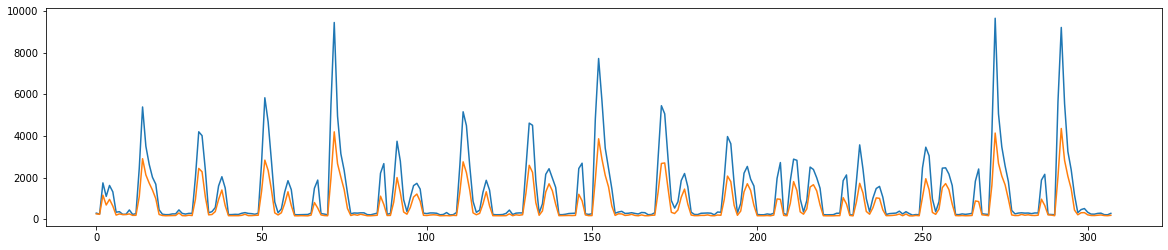

In [122]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

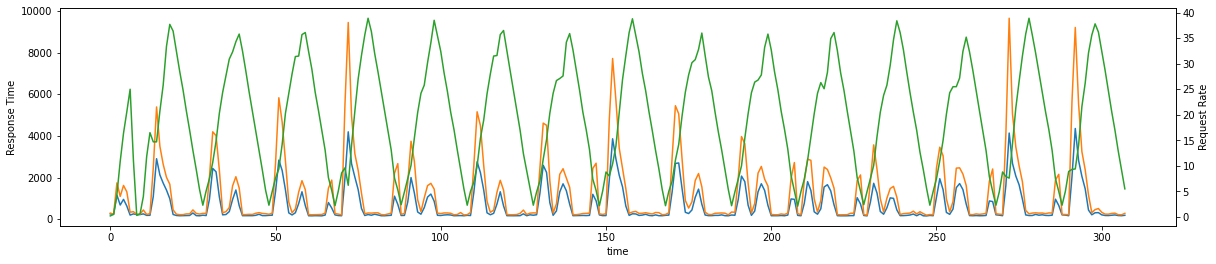

In [123]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

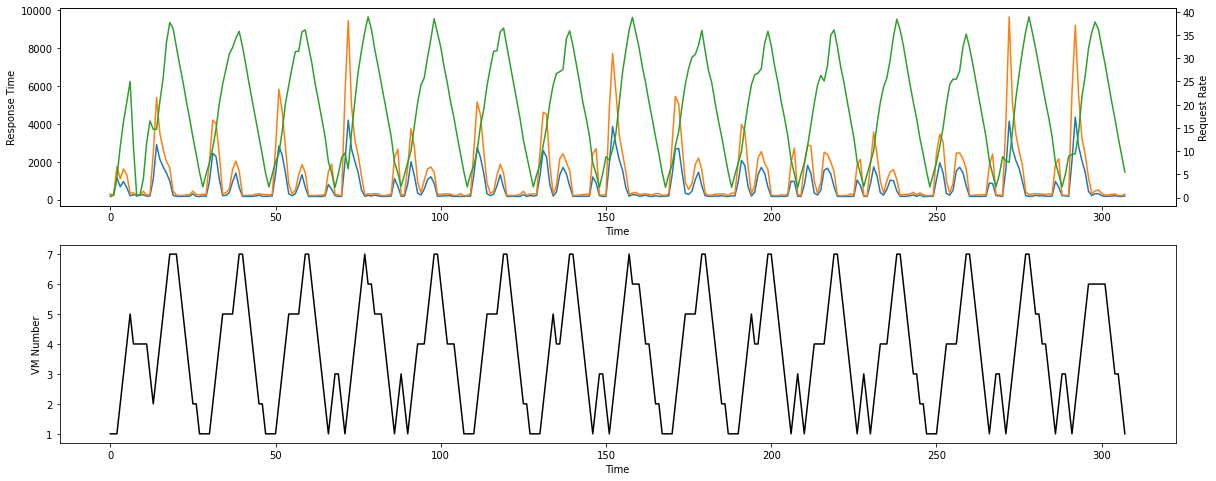

In [124]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [125]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time,worker_number,request_rate
count,308.000000,308.000000,308.000000,308.000000
mean,1299.717830,695.811307,3.733766,19.212662
std,1621.075718,796.449587,1.875757,10.892534
min,190.194000,156.492536,1.000000,0.200000
25%,254.967050,176.401698,2.000000,9.275000
50%,339.220275,232.968122,4.000000,20.300000
75%,1944.916812,1025.477527,5.000000,28.300000
max,9652.801250,4356.476926,7.000000,38.900000


In [126]:
df.columns

Index(['time', 'response_time_p95', 'response_time', 'worker_number',
       'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%', 'CPU1User%',
       'CPU1Idle%', 'CPU1Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs'],
      dtype='object')

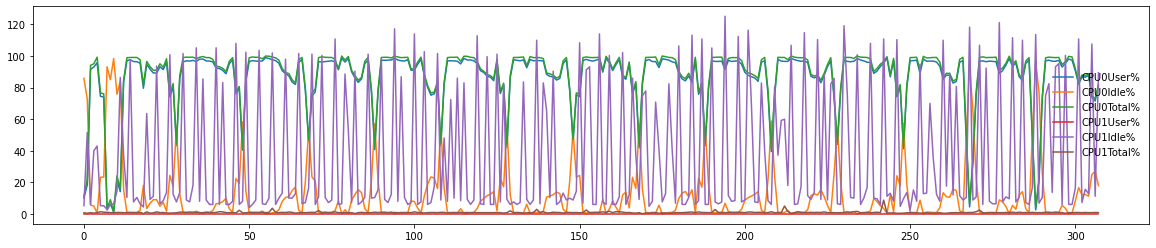

In [127]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [128]:
df.iloc[:, 5:11].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,308.000000,308.000000,308.000000,308.0,308.000000,308.000000
mean,86.517208,11.704870,88.208442,0.0,37.049351,0.937338
std,18.946226,18.777926,19.024186,0.0,41.095657,0.619185
min,1.200000,0.000000,1.400000,0.0,2.400000,0.100000
25%,84.375000,0.900000,85.775000,0.0,7.200000,0.800000
50%,94.950000,3.450000,96.550000,0.0,10.400000,0.800000
75%,96.900000,14.125000,99.100000,0.0,82.625000,1.000000
max,99.000000,98.400000,100.000000,0.0,125.200000,8.700000


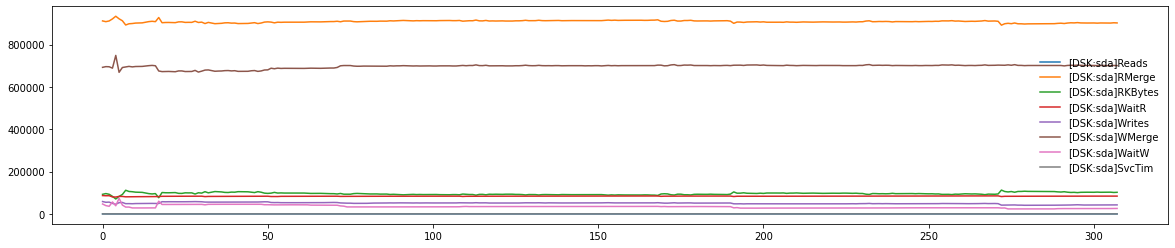

In [129]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [130]:
df.iloc[:, 11:24].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.0,308.000000,308.0,308.0,308.0,308.000000,308.0
mean,0.829545,908729.041558,95982.958442,83778.292208,50247.664935,697306.483117,0.0,33606.932468,100.0,0.0,0.0,31.993182,0.0
std,1.975024,5366.157620,5366.157620,820.756566,4082.989433,9199.473512,0.0,6924.927817,0.0,0.0,0.0,7.868441,0.0
min,0.100000,892080.800000,70509.600000,79684.800000,40823.600000,669206.000000,0.0,23556.400000,100.0,0.0,0.0,1.100000,0.0
25%,0.200000,905872.000000,91931.200000,83434.500000,48110.100000,698788.200000,0.0,28140.800000,100.0,0.0,0.0,30.100000,0.0
50%,0.300000,909118.400000,95593.600000,83811.200000,51423.200000,700799.400000,0.0,33547.400000,100.0,0.0,0.0,33.350000,0.0
75%,0.400000,912780.800000,98840.000000,84268.400000,52219.400000,701617.100000,0.0,35352.400000,100.0,0.0,0.0,36.025000,0.0
max,18.900000,934202.400000,112631.200000,86677.200000,58510.800000,749086.800000,0.0,74053.600000,100.0,0.0,0.0,49.300000,0.0


In [131]:
df.iloc[:, 24:32].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,308.0,308.0,308.0,308.0,308.000000,308.000000,308.0,308.0
mean,0.0,0.0,0.0,0.0,31.993182,31.296753,0.0,0.0
std,0.0,0.0,0.0,0.0,7.868441,7.345706,0.0,0.0
min,0.0,0.0,0.0,0.0,1.100000,1.000000,0.0,0.0
25%,0.0,0.0,0.0,0.0,30.100000,29.675000,0.0,0.0
50%,0.0,0.0,0.0,0.0,33.350000,33.200000,0.0,0.0
75%,0.0,0.0,0.0,0.0,36.025000,35.400000,0.0,0.0
max,0.0,0.0,0.0,0.0,49.300000,43.500000,0.0,0.0


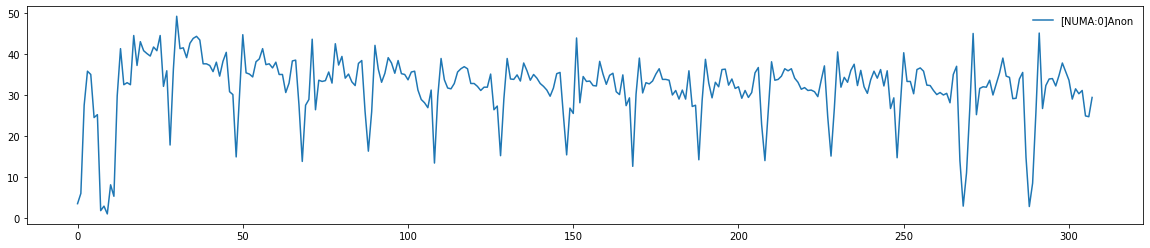

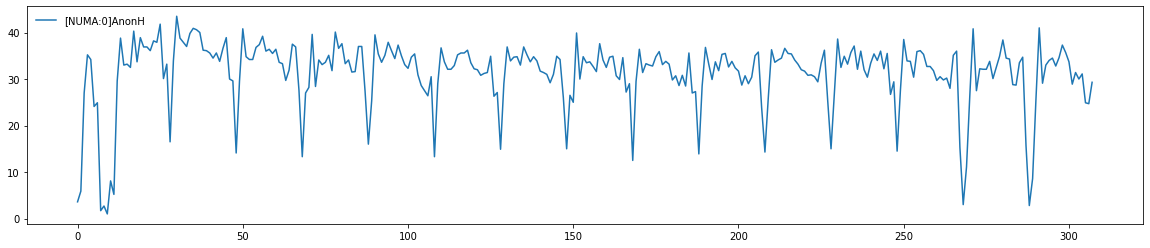

In [132]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

No handles with labels found to put in legend.


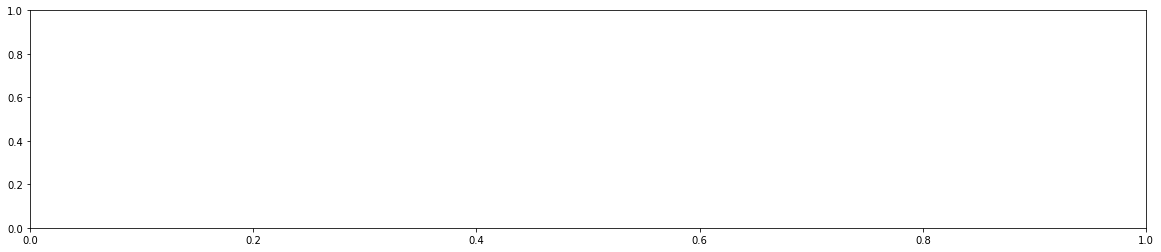

In [133]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'TCP' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [134]:
train_log_file_name  = 'train_by_none.log'

In [135]:
cf = pd.read_csv(train_log_file_name, sep=',', header=0)

In [136]:
print(cf.count()[0])

216


In [137]:
cf['otime'] = cf['time']

cf['time'] = cf['otime'].str[:-1]

In [138]:
cf.head()

,time,notification,actual_vm_number_was,actual_vm_number_is,otime
0,19:57:4,Worker 192.168.0.116 added.,1,2,19:57:42
1,19:57:5,Worker 192.168.0.46 added.,2,3,19:57:52
2,19:58:0,Worker 192.168.0.219 added.,3,4,19:58:03
3,19:58:1,Worker 192.168.0.233 added.,4,5,19:58:11
4,19:58:2,Worker 192.168.0.170 removed.,5,4,19:58:21


In [139]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

In [140]:
df.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,19:57:2,289.71545,253.467500,1,0.2,10.1,85.9,11.3,0.0,5.2,...,0.0,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19:57:3,246.18060,233.239400,1,0.5,18.3,72.8,21.8,0.0,51.6,...,0.0,6.1,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19:57:4,1743.46650,1153.406955,1,4.4,91.6,5.7,94.1,0.0,6.0,...,0.0,27.6,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19:57:5,1095.30860,680.631468,2,10.9,93.0,4.9,95.1,0.0,40.0,...,0.0,35.9,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19:58:0,1620.40445,952.393030,3,16.4,95.8,0.6,99.3,0.0,43.0,...,0.0,35.1,34.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
mf = df.merge(cf, on='time', how='left')

In [142]:
mf.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime
0,19:57:2,289.71545,253.467500,1,0.2,10.1,85.9,11.3,0.0,5.2,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,19:57:3,246.18060,233.239400,1,0.5,18.3,72.8,21.8,0.0,51.6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,19:57:4,1743.46650,1153.406955,1,4.4,91.6,5.7,94.1,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,19:57:42
3,19:57:5,1095.30860,680.631468,2,10.9,93.0,4.9,95.1,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,19:57:52
4,19:58:0,1620.40445,952.393030,3,16.4,95.8,0.6,99.3,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.219 added.,3.0,4.0,19:58:03


In [144]:
mf['delta_vm'] = mf['actual_vm_number_is'] - mf['actual_vm_number_was']

In [145]:
mf.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime,delta_vm
0,19:57:2,289.71545,253.467500,1,0.2,10.1,85.9,11.3,0.0,5.2,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,19:57:3,246.18060,233.239400,1,0.5,18.3,72.8,21.8,0.0,51.6,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,19:57:4,1743.46650,1153.406955,1,4.4,91.6,5.7,94.1,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,19:57:42,1.0
3,19:57:5,1095.30860,680.631468,2,10.9,93.0,4.9,95.1,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,19:57:52,1.0
4,19:58:0,1620.40445,952.393030,3,16.4,95.8,0.6,99.3,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.219 added.,3.0,4.0,19:58:03,1.0


In [146]:
mf.columns

Index(['time', 'response_time_p95', 'response_time', 'worker_number',
       'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%', 'CPU1User%',
       'CPU1Idle%', 'CPU1Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [147]:
mf['worker_number'].isnull().values.any()

False

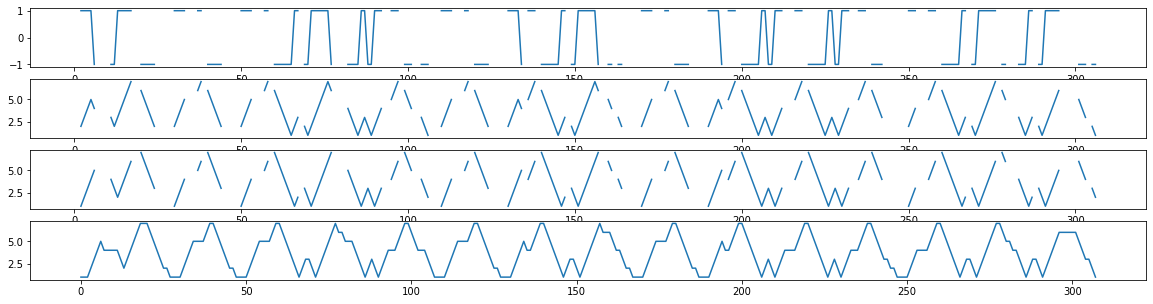

In [148]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])

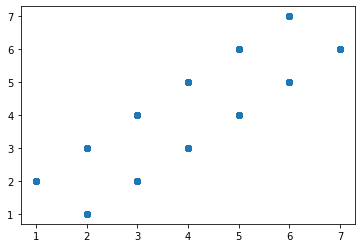

In [149]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])

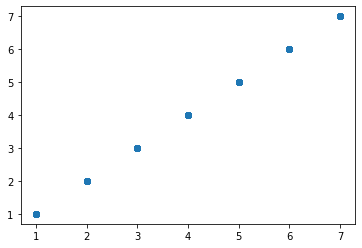

In [150]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])

In [151]:
# Ezt jó hogy megcsináltam (lásd a fenti ábrát)

# A 'actual_vm_number_was' == 'worker_number'

In [152]:
mf.columns

Index(['time', 'response_time_p95', 'response_time', 'worker_number',
       'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%', 'CPU1User%',
       'CPU1Idle%', 'CPU1Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

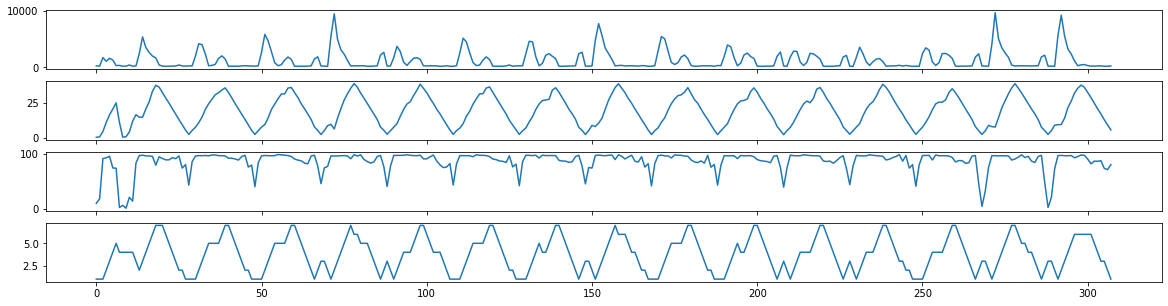

In [157]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])

In [164]:
mf.columns

Index(['time', 'response_time_p95', 'response_time', 'worker_number',
       'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%', 'CPU1User%',
       'CPU1Idle%', 'CPU1Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [166]:
tf = mf[['time', 'worker_number']]

In [167]:
tf['x1'] = mf.time
tf['x2'] = mf.time.shift(1)

/tmp/ipykernel_154684/2089795674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['x1'] = mf.time
/tmp/ipykernel_154684/2089795674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['x2'] = mf.time.shift(1)


In [168]:
tf.head()

,time,worker_number,x1,x2
0,19:57:2,1,19:57:2,NaN
1,19:57:3,1,19:57:3,19:57:2
2,19:57:4,1,19:57:4,19:57:3
3,19:57:5,2,19:57:5,19:57:4
4,19:58:0,3,19:58:0,19:57:5


In [232]:
ff = mf[['time', 'otime', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_was', 'actual_vm_number_is', 'delta_vm']].copy()

In [233]:
ff.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm
0,19:57:2,NaN,253.467500,1,0.2,10.1,NaN,NaN,NaN
1,19:57:3,NaN,233.239400,1,0.5,18.3,NaN,NaN,NaN
2,19:57:4,19:57:42,1153.406955,1,4.4,91.6,1.0,2.0,1.0
3,19:57:5,19:57:52,680.631468,2,10.9,93.0,2.0,3.0,1.0
4,19:58:0,19:58:03,952.393030,3,16.4,95.8,3.0,4.0,1.0


In [234]:
f3 = f2.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [235]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [236]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [237]:
f1 = ff.copy()
f1['CPU0User%Before'] = f1['CPU0User%'].shift(-1)
f1.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
0,19:57:2,NaN,253.467500,1,0.2,10.1,NaN,NaN,NaN,18.3
1,19:57:3,NaN,233.239400,1,0.5,18.3,NaN,NaN,NaN,91.6
2,19:57:4,19:57:42,1153.406955,1,4.4,91.6,1.0,2.0,1.0,93.0
3,19:57:5,19:57:52,680.631468,2,10.9,93.0,2.0,3.0,1.0,95.8
4,19:58:0,19:58:03,952.393030,3,16.4,95.8,3.0,4.0,1.0,74.5


In [238]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [239]:
f2 = f1.dropna()
f2.head(10)

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
2,19:57:4,19:57:42,1153.406955,1,4.4,91.6,1.0,2.0,1.0,93.0
3,19:57:5,19:57:52,680.631468,2,10.9,93.0,2.0,3.0,1.0,95.8
4,19:58:0,19:58:03,952.393030,3,16.4,95.8,3.0,4.0,1.0,74.5
5,19:58:1,19:58:11,629.812835,4,20.6,74.5,4.0,5.0,1.0,74.0
6,19:58:2,19:58:21,196.336644,5,25.0,74.0,5.0,4.0,-1.0,2.5
11,20:01:0,20:01:00,182.716305,4,11.8,14.1,4.0,3.0,-1.0,83.5
12,20:01:1,20:01:11,186.282442,3,16.5,83.5,3.0,2.0,-1.0,97.0
13,20:01:2,20:01:22,1083.220231,2,14.7,97.0,2.0,3.0,1.0,97.7
14,20:01:3,20:01:32,2905.104599,3,14.7,97.7,3.0,4.0,1.0,96.5
15,20:01:4,20:01:42,2125.978691,4,20.7,96.5,4.0,5.0,1.0,96.4


In [240]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [241]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%Before'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%Before'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [242]:
from sklearn.linear_model import LinearRegression

_cpu_x = f3[['cpu_term1', 'cpu_term2']]

_cpu_y = f3['CPU0User%']

_cpu_x.shape

_cpu_y.shape

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_x, _cpu_y)

rr.score(_cpu_x, _cpu_y)

0.45666301910380114

In [243]:
rr.coef_

array([0.43349899, 0.58038445])

In [244]:
rr.intercept_

51.461442547224095

In [245]:
pred_cpu = rr.predict(_cpu_x)

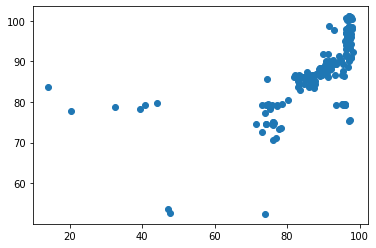

In [246]:
plt.scatter(f3['CPU0User%'], pred_cpu)

In [ ]:
# Állati jó kérdés, hogy a becslés miért 'ennyire szar' amikor az eredeti cikkben azt mondták, hogy viszonlag
# csekély hibával volt képes becsülni a lineáris regresszió a before after állapotot

# Megoldás:

# 1.

# Lehet, hogy ez az eredmény amúgy nem is annyira rossz.

# 2.

# Lehet, hogy mérés rögzítésénél valamit elbaszok

# 3.

# Lehet, hogy nem VM-től kéne lekérnem a metrikákat, hanem tényleg az összestől és azt a statisztikát rakni be

# x.

# Ezek lineáris kombinációja

In [254]:
import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-04-28 13:57:29
13:57:29


NameError: name 'df_cpu' is not defined

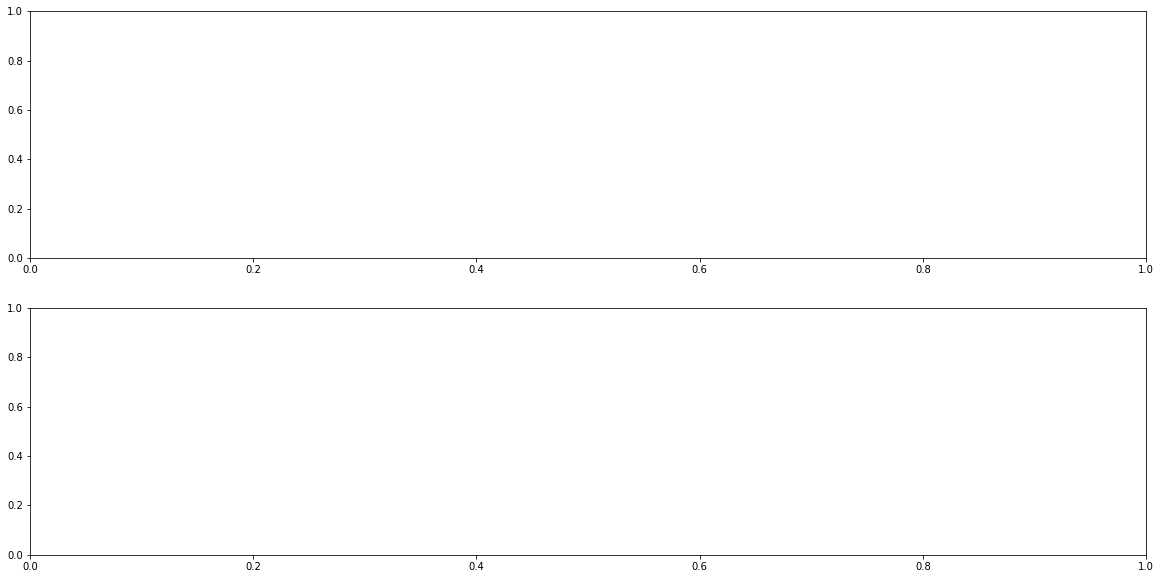

In [21]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

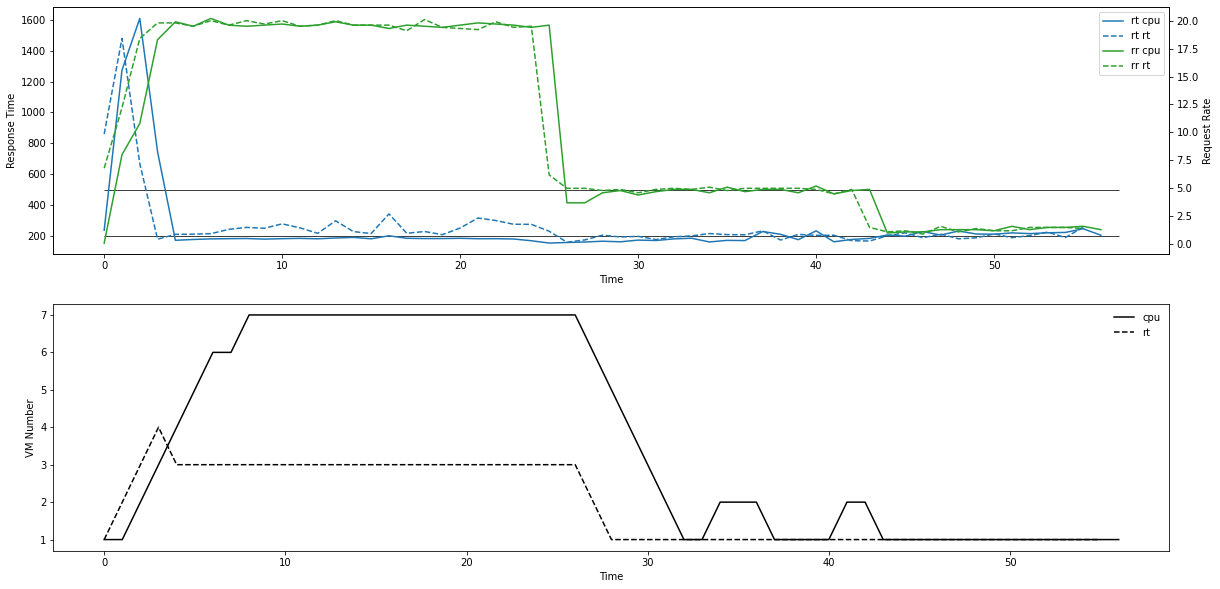

In [24]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

In [25]:
# https://towardsdatascience.com/matplotlib-styles-for-scientific-plotting-d023f74515b4

# https://github.com/garrettj403/SciencePlots

# https://pypi.org/project/SciencePlots/

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


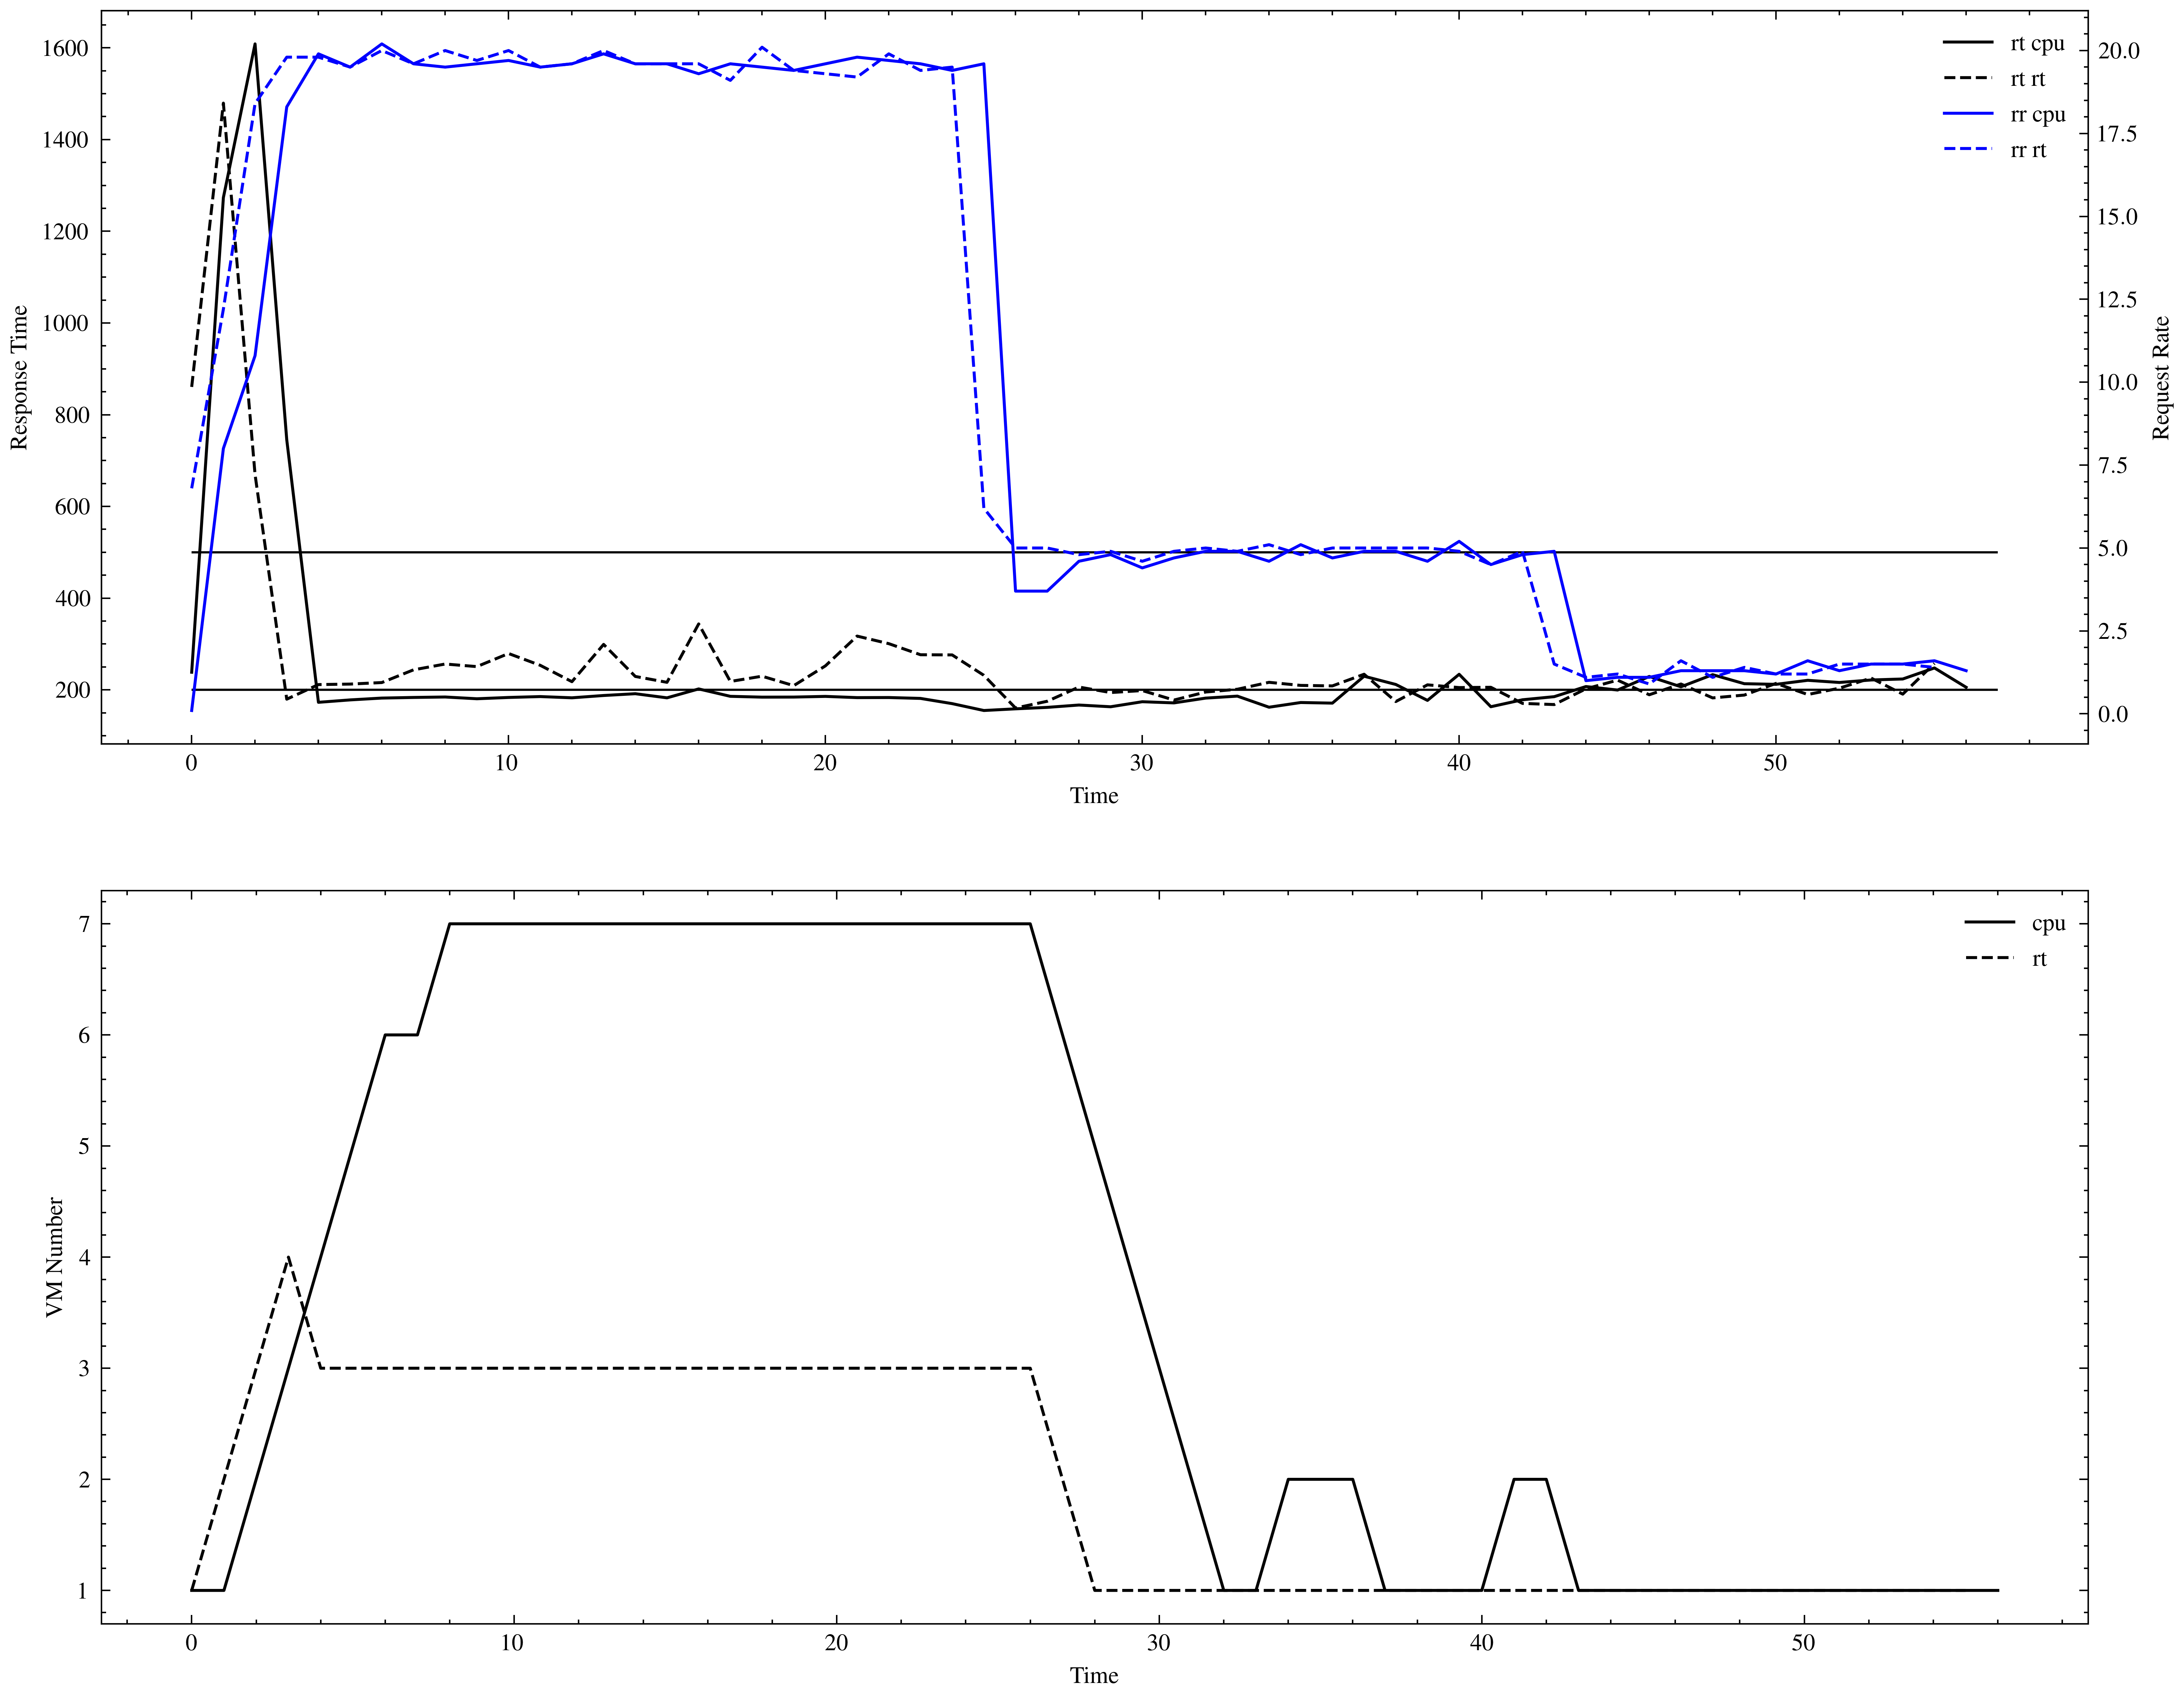

In [27]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

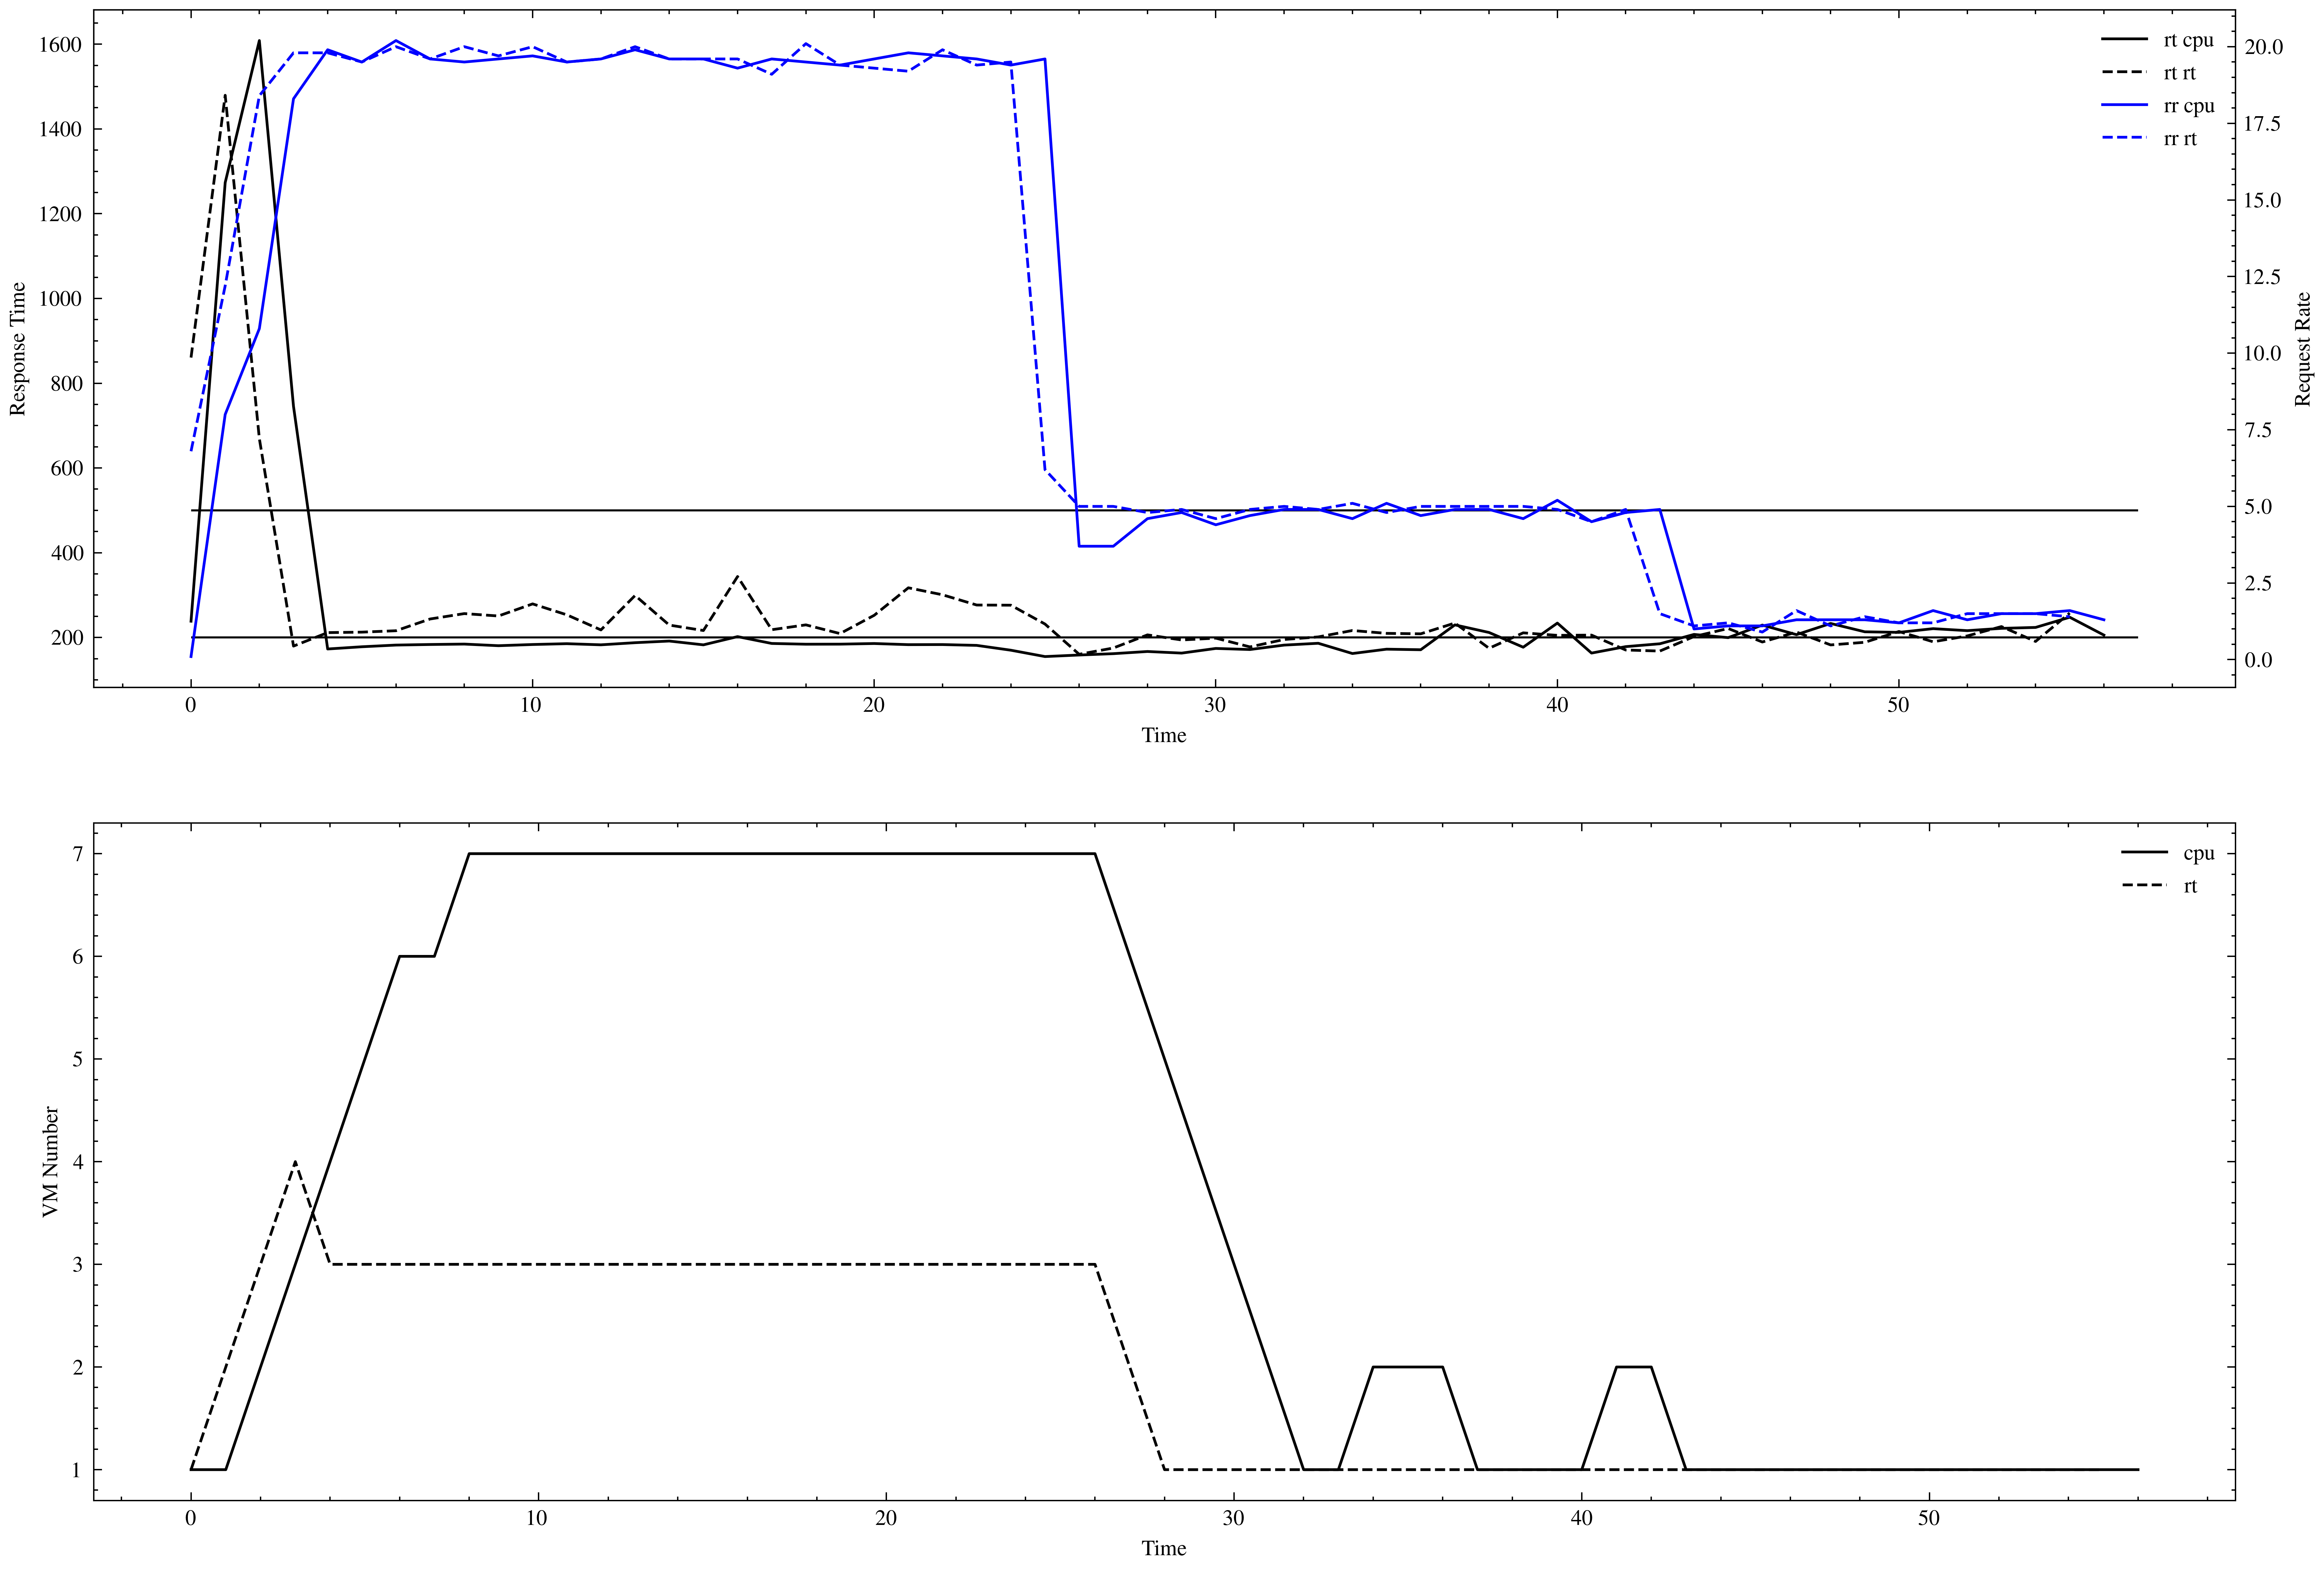

In [28]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

# Egy nagyon fontos cikk

Hogy kell a terhelést generálni illetve milyen különbségek vannak az egyes módszerekben.

https://techcommunity.microsoft.com/t5/testingspot-blog/simulating-targeted-throughput-for-load-testing-with-jmeter/ba-p/2227962

```megvan a megoldás

- infititre kell állítani a loopot
- be kell állítani az időt hogy mennyi ideig tartson
- egymás alá kell rakni a threadgruppokat
- be kell állítani a testplanbe, hogy folyamatosna kövessék egymást ne párhuzamosan
- minegyik treadgruppba be kell rakni ugyan azt a kérést

- modul controlt kell elhelyezni a threadgroupban
- kívül kell elhelyezni a kivánt oldalt és a requestet a testplan alatt
```

## CPU vs Response Time új 20req/sec terheléssel

Új JMeter terhelést raktam fel mert az összes korább rossz módszert követ.

Nem volt fix a terhelési görbe, itt most már az.

In [29]:
rt_log_file_name  = 'Logs/Load2/metric_rt_threshold200_500.log'
cpu_log_file_name = 'Logs/Load2/metric_cpu_threshold40_70.log'

In [30]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [31]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

57
56


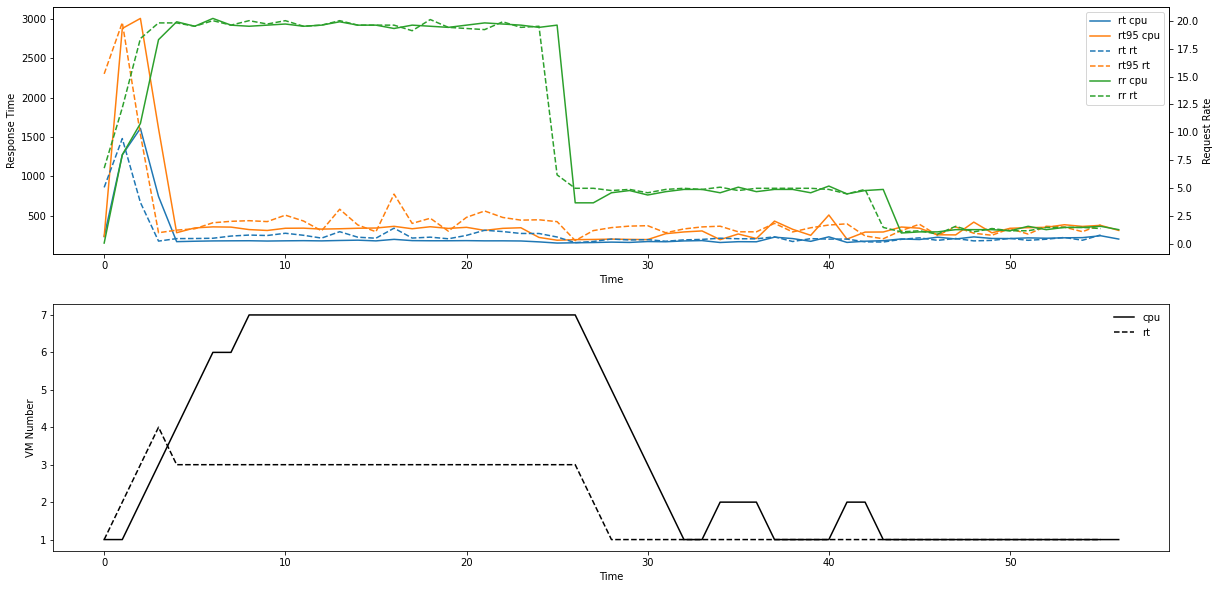

In [32]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

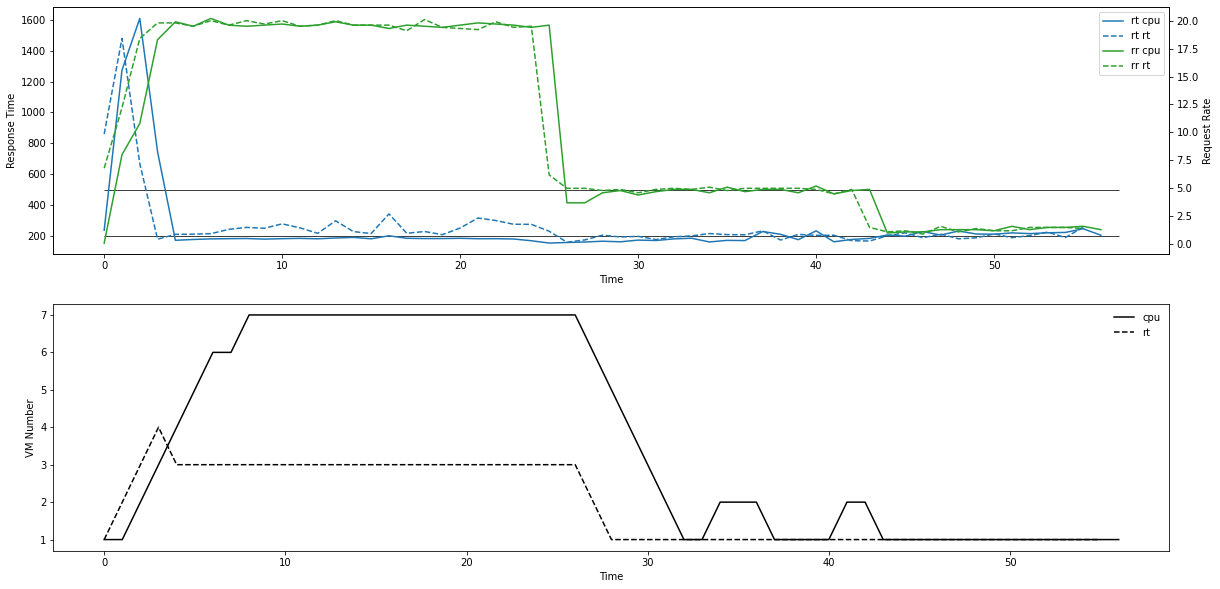

In [33]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

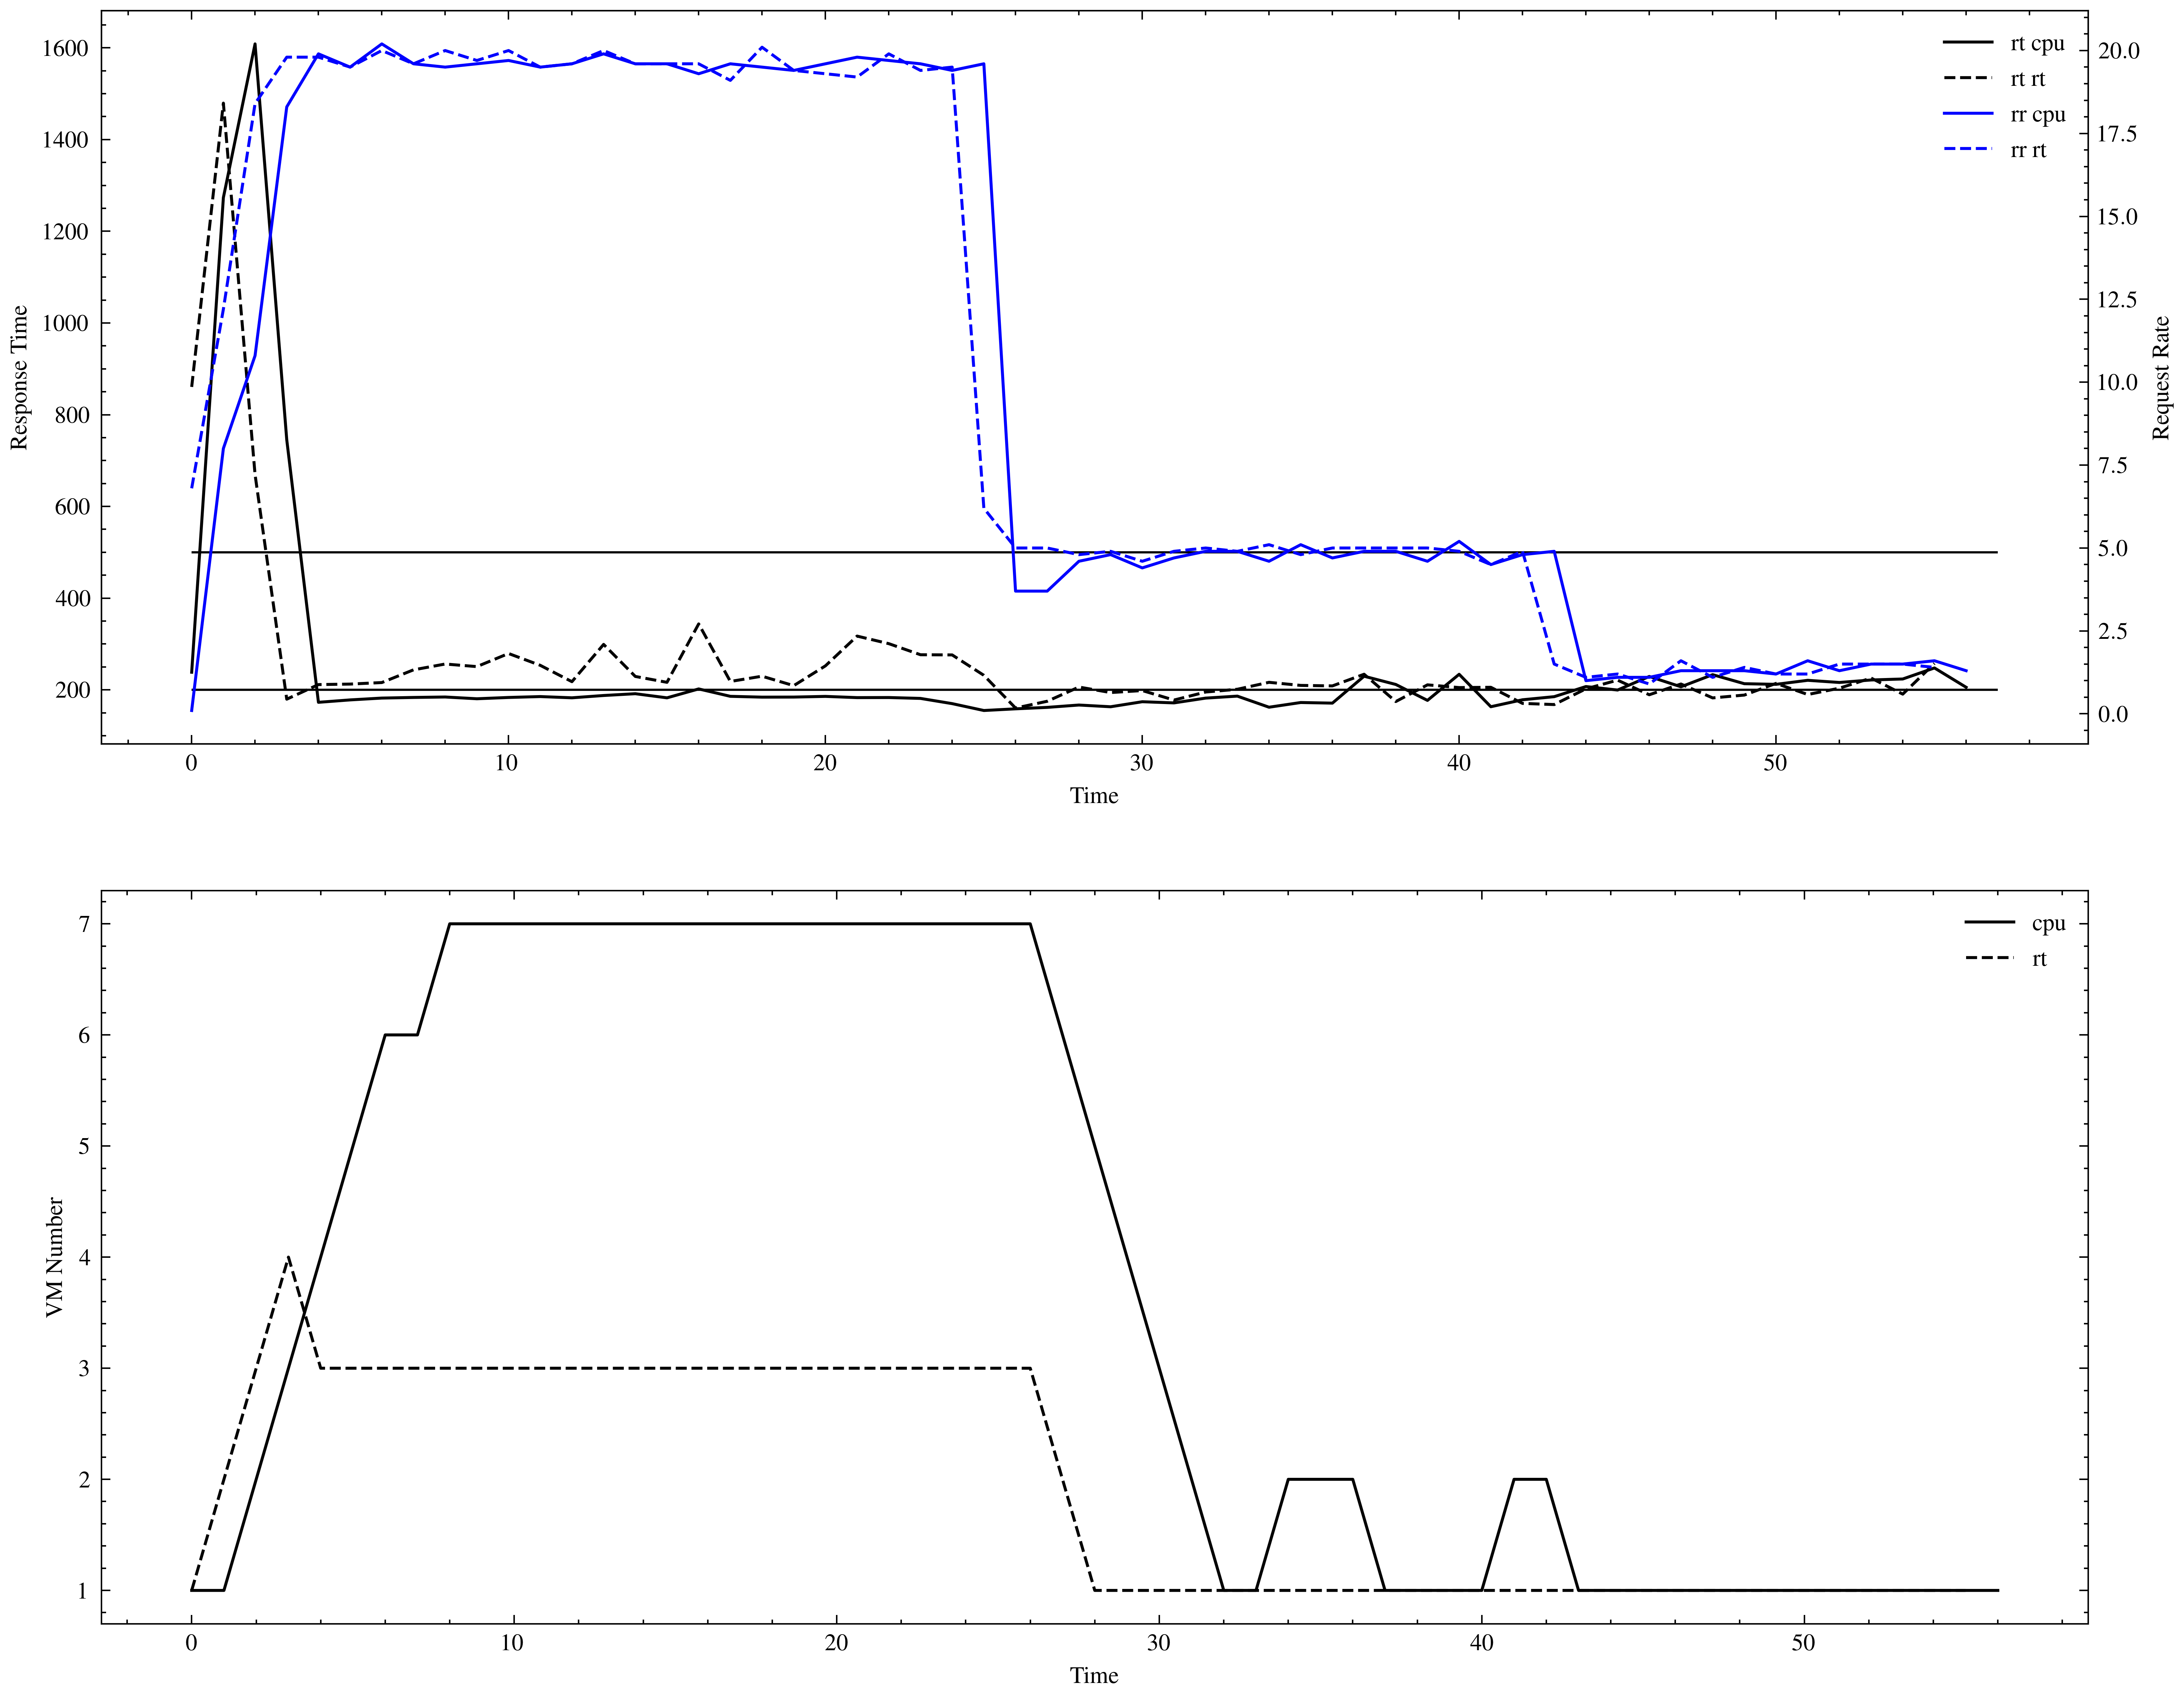

In [34]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()